# Resolução da segunda lista de exercícios de Estatística Aplicada

Questões resolvidades nesse *Jupyter Notebook*:

Questão 1 - Livro-texto Cap. 4: ex. 3 (p. 73)

Questão 2 - Livro-texto Cap. 4: ex. 8 (p. 79)

Questão 4 - Livro-texto Cap. 4: ex. 34 (p. 99)

Questão 5


## Instalando e importando as bibliotecas.

In [ ]:
!pip install -q tabula-py
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import tabula
from scipy.stats import chi2_contingency
plt.style.use('ggplot')

## QUESTÃO 1

Numa pesquisa sobre rotatividade de mão-de-obra, para uma amostra de 40 pessoas foram observadas duas variáveis: número de empregos nos últimos dois anos $(X)$ e salário mais recente, em número de salários mínimos $(Y)$.

Extraindo a base de dados do livro.

In [ ]:
df1 = tabula.read_pdf('_P. A. Morettin, W. de O. Bussab-Estatística Básica-Saraiva (2010).pdf',pages=90, stream=True)

Got stderr: Mar 30, 2021 2:49:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:22 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>
Mar 30, 2021 2:49:23 AM org.apache.pdfbox.pdmodel.font.PDType1Font <init>



Base de dados.

In [ ]:
df1 = df1[0]

df2 = df1[['Indivíduo', 'X', 'Y']]
df3 = df1[['Indivíduo.1', 'X.1', 'Y.1']]
df3 = df3.rename(columns={'Indivíduo.1':'Indivíduo', 'X.1':'X', 'Y.1':'Y'})

df1 = df2.append(df3)

df1=df1.reset_index().drop('index', axis=1)

#primeiras 10 linhas da base de dados
df1.head(10)

,Indivíduo,X,Y
0,1,1,6
1,2,3,2
2,3,2,4
3,4,3,1
4,5,2,4
5,6,2,1
6,7,3,3
7,8,1,5
8,9,2,2
9,10,3,2


Medianas das colunas.

In [ ]:
print('Mediana da variável X: ', df1['X'].median())
print('Mediana da variável Y: ', df1['Y'].median())


Mediana da variável X:  2.0
Mediana da variável Y:  2.5


Classificando os dados como alto e baixo.

In [ ]:
#Classificando a coluna X
lista1=df1['X'].tolist()
lista2=[]
for i in lista1:
  if i >= df1['X'].median():
    i='alto'
  else:
    i='baixo'
  lista2.append(i)

#Classificando a coluna Y
lista3=df1['Y'].tolist()
lista4=[]
for i in lista3:
  if i >= df1['Y'].median():
    i='alto'
  else:
    i='baixo'
  lista4.append(i)

#criando as novas colunas
df1['Class_X']=lista2
df1['Class_Y'] = lista4

(a) Usando a mediana, classifique os indivíduos em dois níveis, alto e baixo, para cada uma das variáveis, e construa a distribuição de freqüências conjunta das duas classificações.

In [ ]:
tabela = pd.crosstab(df1["Class_X"], df1["Class_Y"], margins=True)
tabela

Class_Y,alto,baixo,All
Class_X,,,
alto,13,19,32
baixo,7,1,8
All,20,20,40


Tabela em termos percentuais.

In [ ]:
tabela/tabela['All'][2]

Class_Y,alto,baixo,All
Class_X,,,
alto,0.325,0.475,0.8
baixo,0.175,0.025,0.2
All,0.500,0.500,1.0


(b) Qual a porcentagem das pessoas com baixa rotatividade e ganhando pouco?

In [ ]:
print('A porcentagem é de :',(tabela['baixo'][1]/tabela['All'][2])*100, '%')

A porcentagem é de : 2.5 %


(c) Qual a porcentagem das pessoas que ganham pouco?

In [ ]:
print('A porcentagem é de :',(tabela['baixo']['All']/tabela['All'][2])*100, '%')

A porcentagem é de : 50.0 %


(d) Entre as pessoas com baixa rotatividade, qual a porcentagem das que ganham pouco?

In [ ]:
print('A porcentagem é de :',(tabela['baixo'][1]/tabela['All'][1])*100, '%')

A porcentagem é de : 12.5 %


(e) A informação adicional dada em (d) mudou muito a porcentagem observada em (c)? O que isso significa?

Resposta : **Sim, a porcentagem caiu muito (de 50% para 12.5%), isso mostra que as pessoas que ganham pouco possuem uma alta rotatividade**.

## QUESTÃO 2

Qual o valor de $\chi^2$ e de $C$ para os dados do Problema 3? E para o Problema 6? Calcule $T$.

Tabela com as informações.

In [ ]:
tabela

Class_Y,alto,baixo,All
Class_X,,,
alto,13,19,32
baixo,7,1,8
All,20,20,40


Qual o valor de $\chi^2$ e de $C$ para os dados do Problema 3? E para o Problema 6? Calcule $T$.

In [ ]:
a = tabela[:2][1:2]['alto'][0]
b = tabela[:2][1:2]['baixo'][0]
c = tabela[:2][:1]['alto'][0]
d = tabela[:2][:1]['baixo'][0]
e = tabela[:2][:1]['All'][0]
f = tabela[:2][1:2]['All'][0]
g = tabela[:2][:1]['All'][0]/2
h = tabela[:2][1:2]['All'][0]/2

Calculando o  $\chi^2$:

In [ ]:
chi = ((b-h)**2)/h + ((a-h)**2)/h + ((d-g)**2)/g + ((c-g)**2)/g
chi

5.625

também pode ser calculado pela função abaixo:

In [ ]:
chi2_contingency(tabela)[0]

5.625

Calculando o valor de $C$.

In [ ]:
c = np.sqrt(chi/(chi+tabela['All'][2]))
c

0.3511234415883917

Calculando o $T$

No cálculo $r$ = $s$  = 2 (categorias alto e baixo).

In [ ]:
r = 2
s = 2
np.sqrt((chi/tabela['All'][2])/((r-1)*(s-1)))

0.375

## QUESTÃO 4

Faça o gráfico $q$ × $q$ para os dois conjuntos de dados em $A$ e $B$ a seguir.

In [ ]:
lista_a = [65, 54, 49, 60, 70, 25, 87, 100, 70, 102, 40, 47]
lista_b = [48, 35, 45, 50, 52, 20, 72, 102, 46, 82]

Calculando os quantis.

In [ ]:
x1 = np.quantile(lista_a, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
x2 = np.quantile(lista_b, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

Gerando o gráfico de $Quantis$ x $Quantis$ (*QQplot*).

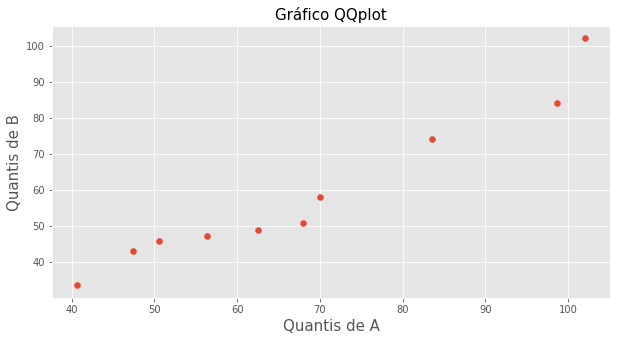

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(x1,x2)
plt.title('Gráfico QQplot', size=15)
plt.xlabel('Quantis de A', size=15)
plt.ylabel('Quantis de B',size=15)
plt.show()
plt.close()

## QUESTÃO 5

A tabela a seguir reporta o número de linhas telefônicas por mil habitantes em cada estado do Brasil, em 2001.

Determine os seus quartis. Construa o Box-plot. Observe se existem alguns pontos discrepantes.

In [ ]:
estados = ['Acre','Alagoas','Amapá','Amazonas','Bahia','Ceará','D. Federal',
           'E. Santo','Goiás','Maranhão', 'M. Grosso','M. G. do Sul',
           'Minas Gerais','Pará','Paraíba','Paraná','Pernambuco','Piauí',
           'Rio de Janeiro','R. G. do Norte','R. G. do Sul','Rondônia',
           'Roraima','Santa Catarina','São Paulo','Sergipe','Tocantins']

linhas = [183.8,125.4,193.3,162,142.3,140.6,456.8,228.7,231.4,86.1,199.6,235.3,
          218.6,128,125.4,244.2, 147.8,118.2,347.5,150.1,236.9,214.6,214.1,
          257.3,362.8,140.7,113.8]

Criando a base de dados.

In [ ]:
df5 = pd.DataFrame(estados, columns=['Estados'])
df5['linhas'] = linhas
df5.head()

,Estados,linhas
0,Acre,183.8
1,Alagoas,125.4
2,Amapá,193.3
3,Amazonas,162.0
4,Bahia,142.3


Calculando os quartis.

Os valores de 25%, 50% e 75% são, respectivamente, o primeiro, segundo e terceiro quartis da base de dados.

In [ ]:
df5.describe().T[['25%','50%','75%']]

,25%,50%,75%
linhas,140.65,193.3,233.35


No *Boxplot* dos dados, podemos ver que há um valor discrepante (*outlier*) nessa base de dados.

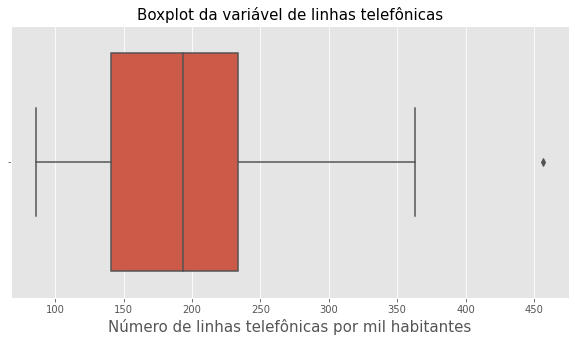

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='linhas', data=df5)
plt.xlabel('Número de linhas telefônicas por mil habitantes', size=15)
plt.title('Boxplot da variável de linhas telefônicas', size=15);